<a href="https://colab.research.google.com/github/Rstam59/TaskDataRepoForStudents/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes
!unzip human-emotions-datasethes.zip

Streaming output truncated to the last 5000 lines.
  inflating: EmotionsDataset/data/nothing/720.jpg  
  inflating: EmotionsDataset/data/nothing/721.jpg  
  inflating: EmotionsDataset/data/nothing/722.jpg  
  inflating: EmotionsDataset/data/nothing/723.jpg  
  inflating: EmotionsDataset/data/nothing/724.jpg  
  inflating: EmotionsDataset/data/nothing/725.jpg  
  inflating: EmotionsDataset/data/nothing/726.jpg  
  inflating: EmotionsDataset/data/nothing/727.jpg  
  inflating: EmotionsDataset/data/nothing/728.jpg  
  inflating: EmotionsDataset/data/nothing/729.jpg  
  inflating: EmotionsDataset/data/nothing/73.jpg  
  inflating: EmotionsDataset/data/nothing/730.jpg  
  inflating: EmotionsDataset/data/nothing/731.jpg  
  inflating: EmotionsDataset/data/nothing/732.jpg  
  inflating: EmotionsDataset/data/nothing/733.jpg  
  inflating: EmotionsDataset/data/nothing/734.jpg  
  inflating: EmotionsDataset/data/nothing/735.jpg  
  inflating: EmotionsDataset/data/nothing/736.jpg  
  inflating: E

In [ ]:
import tensorflow as tf


data_dir = '/content/EmotionsDataset/data'
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3945 files belonging to 4 classes.
Using 3156 files for training.
Found 3945 files belonging to 4 classes.
Using 789 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'happy', 'nothing', 'sad']


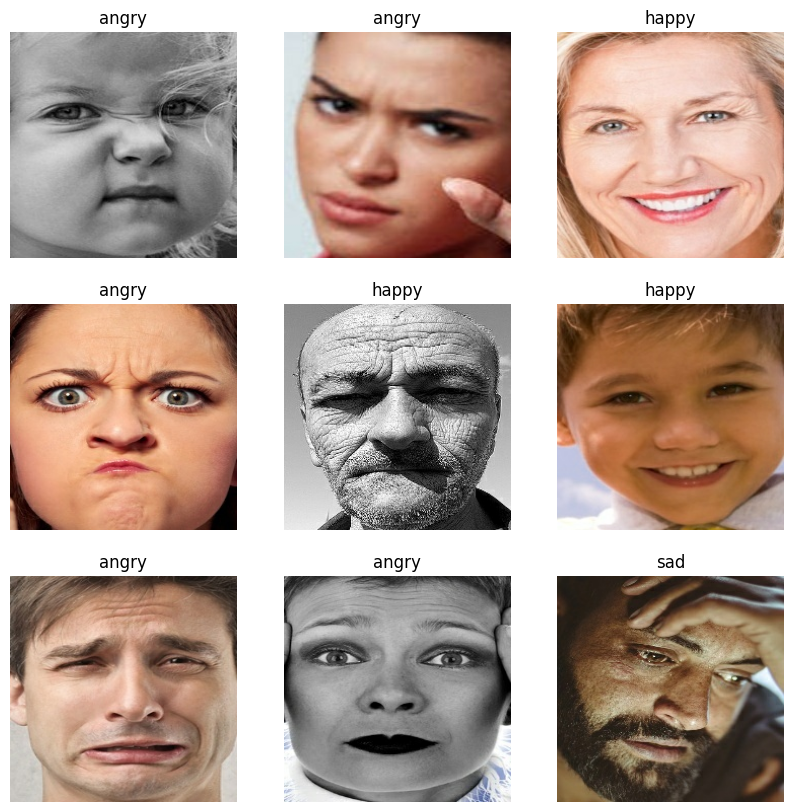

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 1, 0, 1, 1, 0, 0, 3, 2, 1, 1, 1, 0, 1, 3, 0, 0, 1, 3, 1, 1,
       3, 1, 0, 2, 3, 3, 3, 2, 0, 1], dtype=int32)>

In [ ]:
# import numpy as np
# normalization_layer = tf.keras.layers.Rescaling(1./255)

# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# print(np.min(first_image), np.max(first_image))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.compile(
  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
model.fit(train_ds,
          validation_data = val_ds,
          epochs = 8)

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.4658 - loss: 1.1302 - val_accuracy: 0.6362 - val_loss: 0.8335
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6288 - loss: 0.8062 - val_accuracy: 0.6844 - val_loss: 0.7470
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6982 - loss: 0.7137 - val_accuracy: 0.7072 - val_loss: 0.6982
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7353 - loss: 0.6466 - val_accuracy: 0.7199 - val_loss: 0.6818
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7477 - loss: 0.5966 - val_accuracy: 0.7224 - val_loss: 0.6848
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7714 - loss: 0.5568 - val_accuracy: 0.7224 - val_loss: 0.6962
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7894 - loss: 0.5260 - val_accuracy: 0.7174 - val_loss: 0.7046
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8016 - loss: 0.4992 - val_accuracy: 0.7199 - 

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

inputs = tf.keras.layers.Input(shape =(224, 224, 3))
x = base_model(inputs, training = False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model_2.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 121s 552ms/step - accuracy: 0.6334 - loss: 1.6988 - val_accuracy: 0.7503 - val_loss: 0.5674
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 67s 127ms/step - accuracy: 0.8197 - loss: 0.4291 - val_accuracy: 0.7554 - val_loss: 0.5678
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.8747 - loss: 0.3329 - val_accuracy: 0.7440 - val_loss: 0.8992
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.8805 - loss: 0.2666 - val_accuracy: 0.7060 - val_loss: 1.6504
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.8818 - loss: 0.3082 - val_accuracy: 0.6844 - val_loss: 13.2966


(-0.5, 1459.5, 1599.5, -0.5)

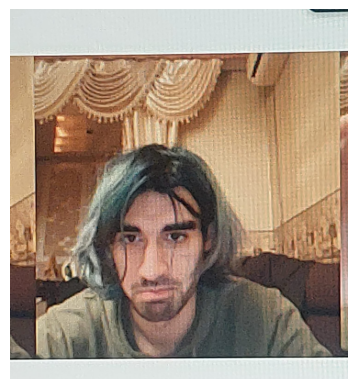

In [ ]:
import matplotlib.image as mpimg
sad_image_dir = '/content/sad.jpeg'

sad_image = mpimg.imread(sad_image_dir)
plt.imshow(sad_image)
plt.axis('off')

In [ ]:
import numpy as np

sad_image = tf.image.resize(sad_image, (224, 224))
class_names[np.argmax(model.predict(np.expand_dims(sad_image, axis=0)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'sad'

In [ ]:
class_names

['angry', 'happy', 'nothing', 'sad']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: sad, True class: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: sad, True class: happy


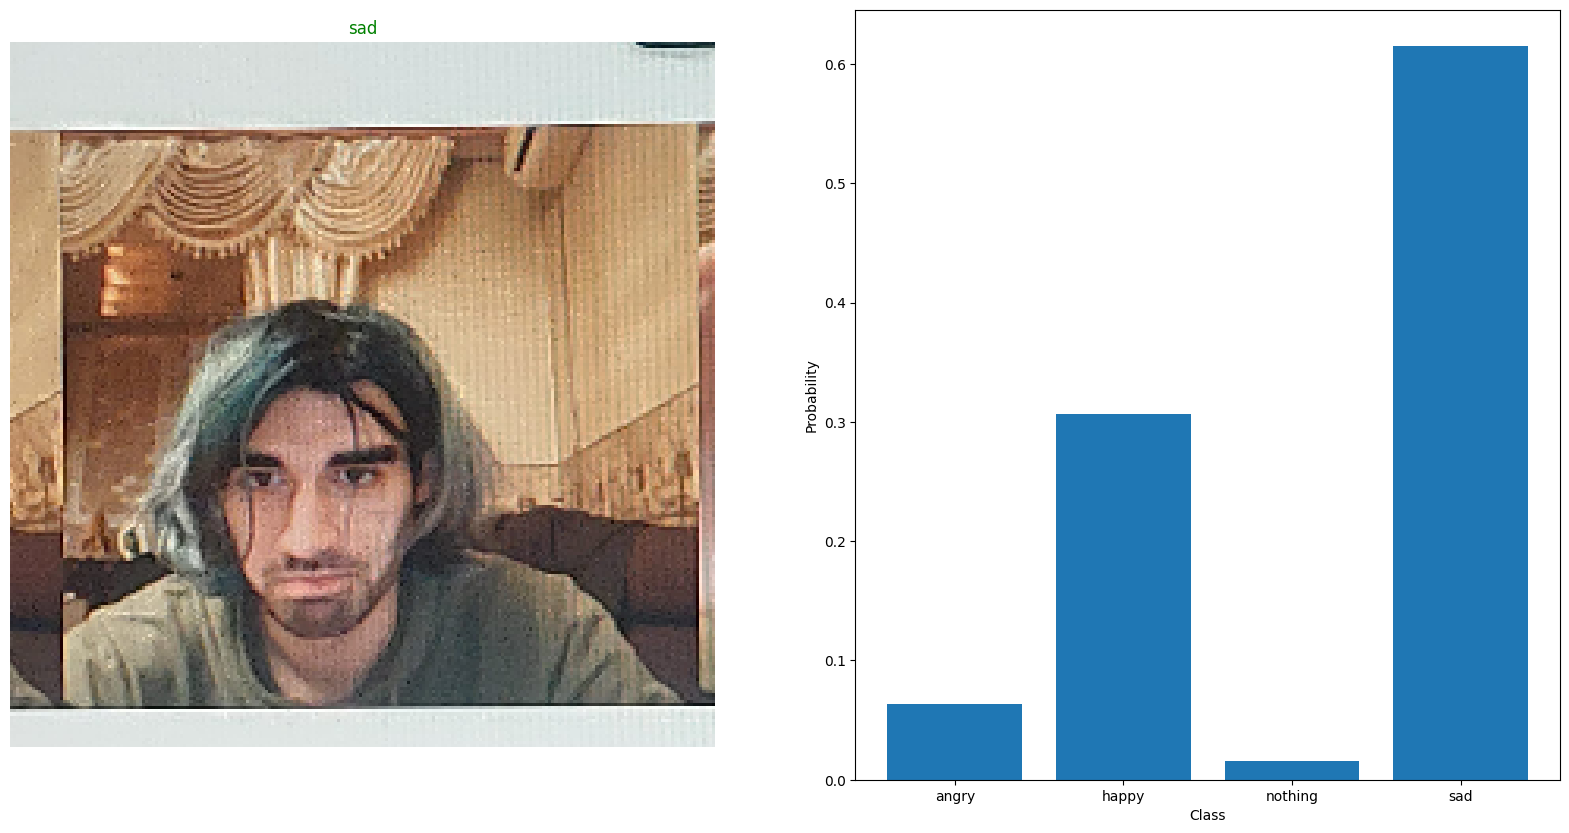

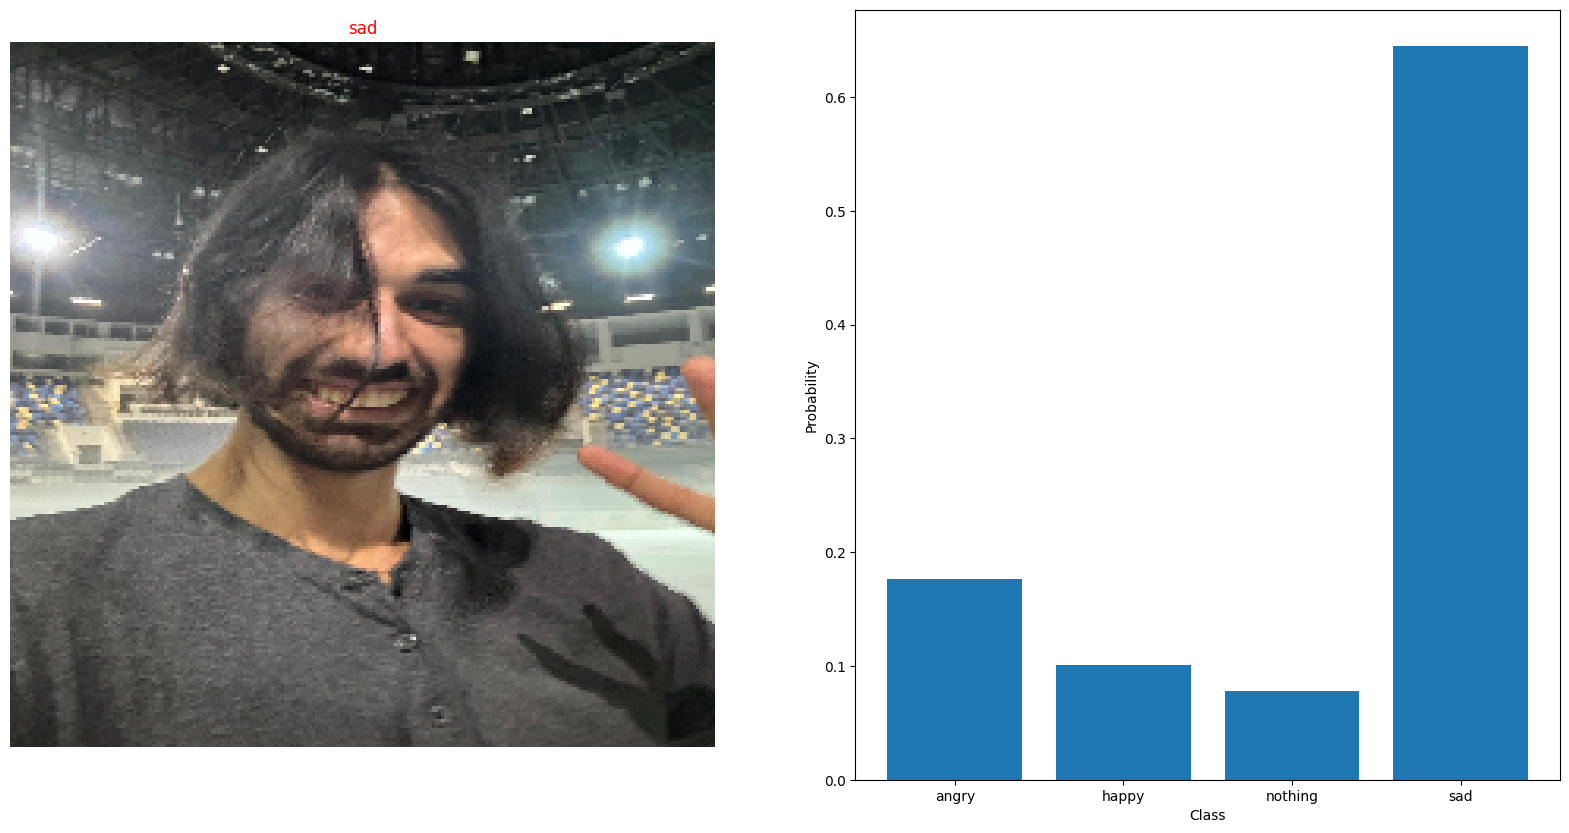

In [ ]:
def pred_and_plot(model, image_path, true_class):
    plt.figure(figsize=(20, 10))
    image = mpimg.imread(image_path)
    image = tf.image.resize(image, (224, 224))
    pred_probs = model.predict(np.expand_dims(image, axis=0))
    pred = class_names[np.argmax(pred_probs)]

    plt.subplot(1, 2, 1)
    plt.imshow(image/255.)
    if pred == true_class:
        plt.title(pred, color = 'green')
    else:
        plt.title(pred, color = 'red')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.bar(class_names, pred_probs[0])
    plt.xlabel('Class')
    plt.ylabel('Probability')
    print(f'Predicted class: {pred}, True class: {true_class}')


pred_and_plot(model, sad_image_dir, 'sad')
pred_and_plot(model, "/content/happy.jpeg", 'happy')